<p style="background-color: white; color: black; font-family: Cambria; font-size: 2em; text-align: center; border-radius: 30px; box-shadow: 0 4px 8px lightsteelblue; padding: 25px;  border: 1px solid black;">
Kaggle. IBM employees.
</p>


In [75]:
# Importing neccessary libraries

import pandas as pd
import numpy as np
import scipy.stats as sc
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
%matplotlib inline

<p style="background-color: white; color: black; font-family: Georgia; font-size: 2em; text-align: left; border-radius: 10px; padding: 10px; box-shadow: 0 4px 8px lightsteelblue; margin: 20px 0; margin-right: 65%; border: 1px solid black;">
1. Feature engineering
</p>


 This dataset contains various information about empoyees, such as salary, education, work-life balance, work perfomance etc.
 Let's explore it.

In [21]:
# Loading the dataset

ibm = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.xls')

In [22]:
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [23]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

One of the important preprocessing procedures is to deal somehow with missing values. We can replace them with some data related to other features, or even delete, if we decide that it's appropriate. But as far as we see, that our dataset doesn't have null values, we don't need to do anything.

**Let's look at some other features of the dataset:**
- *Attrition* - this is a target value, telling that a person left his job by some reason;
- *EmployeeCount* - not clear;
- *EmployeeNumber* - not clear (probably smth. like id);
- *DailyRate*, *HourlyRate*, *MonthlyRate* - seems to be salary per period, but need to be checked in accordiance with *MonthlyIncome*;
- *Gender* - since we can't assume that the gender separation is appropriate, and this feature would hardly make a sufficient impact to our result, moreover it can mistakenly change the target prediction - we will delete it;
- *PercentSalaryHike* - salary increasing percent;
- *StockOptionLevel* - option of buying stocks for employee.

**Let's explore these variables more precisely.**

In [24]:
# EmployeeCount variable is always equal to 1, so we can just drop it

ibm['EmployeeCount'].describe()

count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64

In [25]:
# Indeed, this is some kind of employee id. Should be also dropped

ibm['EmployeeNumber']

0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: EmployeeNumber, Length: 1470, dtype: int64

In [26]:
ibm[['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome']]

,DailyRate,HourlyRate,MonthlyRate,MonthlyIncome
0,1102,94,19479,5993
1,279,61,24907,5130
2,1373,92,2396,2090
3,1392,56,23159,2909
4,591,40,16632,3468
...,...,...,...,...
1465,884,41,12290,2571
1466,613,42,21457,9991
1467,155,87,5174,6142
1468,1023,63,13243,5390


In [27]:
# Let's check the correlation between MonthlyRate and MonthlyIncome
# Although correlation is very low, p-value is not small enough to reject the hypothesys of correlation
# We don't have enough information to clearly understand the value of Rate variables, so we will drop them and use MonthlyIncome as a data of actual salaries

sc.pearsonr(ibm['MonthlyRate'], ibm['MonthlyIncome'])


PearsonRResult(statistic=0.034813626134121874, pvalue=0.18218959924707867)

In [28]:
# Deleting variables

ibm = ibm.drop(['DailyRate', 'HourlyRate', 'MonthlyRate', 'EmployeeNumber', 'EmployeeCount', 'Gender'], axis=1)
ibm.shape

(1470, 29)

  Now, let's look at the  categorical variables:


In [29]:
ibm.select_dtypes(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Sales Executive,Married,Y,No


Finally let's look at the graph of unique number of categorical and numeric features:

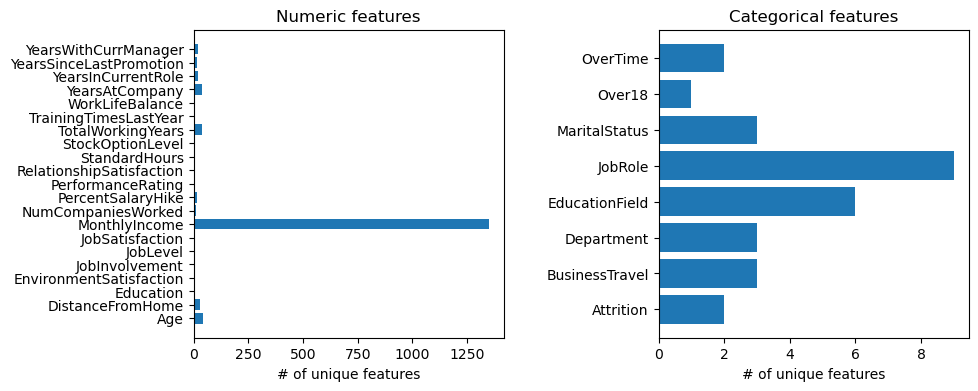

In [30]:
cat_features = ibm.select_dtypes(include=['object']).columns.values
num_features = ibm.select_dtypes(include=['int']).columns.values

fig, ax = plt.subplots(1, 2, figsize=(10,4))
plt.subplots_adjust(wspace=0.5)
ax[1].barh(cat_features, ibm[cat_features].nunique());
ax[1].set_xlabel('# of unique features')
ax[1].set_title('Categorical features')
ax[0].barh(num_features, ibm[num_features].nunique());
ax[0].set_xlabel('# of unique features')
ax[0].set_title('Numeric features')
plt.show();

We see that 'Over18' is just single variable and should be deleted. Let's check if we have more such variables and drop them:

In [31]:
ibm = ibm.loc[:, ibm.nunique() != 1]

We should decide how we will change the categorical data.  
We can use **Label encoding** or **One hot encoding**. **Label encoding** is better if we don't have a gradation of our variables, like *EducationField*. But for such features as *BusinessTravel* we can use **One hot encoding**, since Travel_frequently > Travel_Rarely > Non-Travel

In [32]:
ibm['BusinessTravel'] = ibm['BusinessTravel'].replace({'Travel_Rarely' : 1, 'Travel_Frequently' : 2, 'Non-Travel' : 0})

Let's look at the remaining ones

In [33]:
features = ibm.select_dtypes(include=['object']).columns.values

for feature in features:
    print(f'{feature} unique values: {ibm[feature].unique()}')
    print('-------------------------------------')
    

Attrition unique values: ['Yes' 'No']
-------------------------------------
Department unique values: ['Sales' 'Research & Development' 'Human Resources']
-------------------------------------
EducationField unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
-------------------------------------
JobRole unique values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
-------------------------------------
MaritalStatus unique values: ['Single' 'Married' 'Divorced']
-------------------------------------
OverTime unique values: ['Yes' 'No']
-------------------------------------


Let's use **Label encoding** for these variables.
We can use 'get_dummies' function. It will replace the original column by additional columns according to the number of categories.
Since we have only two categories for *OverTime* and *Attrition* variables, we don't will leave only one column:

In [34]:
# Copying just in case
ibm_df = ibm.copy()

# We create two columns from one (since we have 2 categories)
ibm_df = pd.get_dummies(ibm_df, columns = ['OverTime'], dtype='int')

# We can delete unneccessary category to aviod redundancy
del ibm_df['OverTime_No']

# The same for Attrition
ibm_df = pd.get_dummies(ibm_df, columns = ['Attrition'], dtype='int')
del ibm_df['Attrition_No']

# And then do all other features
ibm_df = pd.get_dummies(ibm_df, columns = ['Department'], dtype='int')
ibm_df = pd.get_dummies(ibm_df, columns = ['EducationField'], dtype='int')
ibm_df = pd.get_dummies(ibm_df, columns = ['JobRole'], dtype='int')
ibm_df = pd.get_dummies(ibm_df, columns = ['MaritalStatus'], dtype='int')
ibm_df = pd.get_dummies(ibm_df, columns = ['BusinessTravel'], dtype='int')
ibm_df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_0,BusinessTravel_1,BusinessTravel_2
0,41,1,2,2,3,2,4,5993,8,11,...,0,0,1,0,0,0,1,0,1,0
1,49,8,1,3,2,2,2,5130,1,23,...,0,1,0,0,0,1,0,0,0,1
2,37,2,2,4,2,1,3,2090,6,15,...,0,0,0,0,0,0,1,0,1,0
3,33,3,4,4,3,1,3,2909,1,11,...,0,1,0,0,0,1,0,0,0,1
4,27,2,1,1,3,1,2,3468,9,12,...,0,0,0,0,0,1,0,0,1,0


<p style="background-color: white; color: black; font-family: Georgia; font-size: 2em; text-align: left; border-radius: 10px; padding: 10px; box-shadow: 0 4px 8px lightsteelblue; margin: 20px 0; margin-right: 55%; border: 1px solid black;">
2. Monthly income predictions
</p>

Let's build a linear regression model using Sklearn.

In [35]:
# We split our dataset to train and test. Usually it's done using 80/20 % of data
threshold = round(len(ibm_df)*0.8)
x_train, y_train = ibm_df.iloc[:threshold, :], ibm_df.iloc[:threshold, 22]
x_test, y_test = ibm_df.iloc[threshold:, :], ibm_df.iloc[threshold:, 22]

del x_train['Attrition_Yes']
del x_test['Attrition_Yes']

In [36]:
# Check that they don't overlap
print(len(x_train) + len(x_test) == len(ibm_df))
print(len(y_train) + len(y_test) == len(ibm_df))

True
True


### Formula for loss function of linear regression:
$Q(w_1, w_0, X) = \frac{1}{n}\sum_{i=1}^{n}(w_1x_i + w_0 - y_i)^2 $

We want to minimize it to get the best result

In [37]:
# let's now try to use test_train_split function from Sklearn instead of doing it manually

x = ibm_df.drop('MonthlyIncome', axis=1)
y = ibm_df['MonthlyIncome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [38]:
# Let's try again
model = LinearRegression()
model.fit(x_train, y_train)

# Checking the score
model.score(x_train, y_train)

0.9448156073674743

In [39]:
# And try it on the test set
model.score(x_test, y_test)

0.9423504468149312

Let's look at the features that our model defined as the most important:

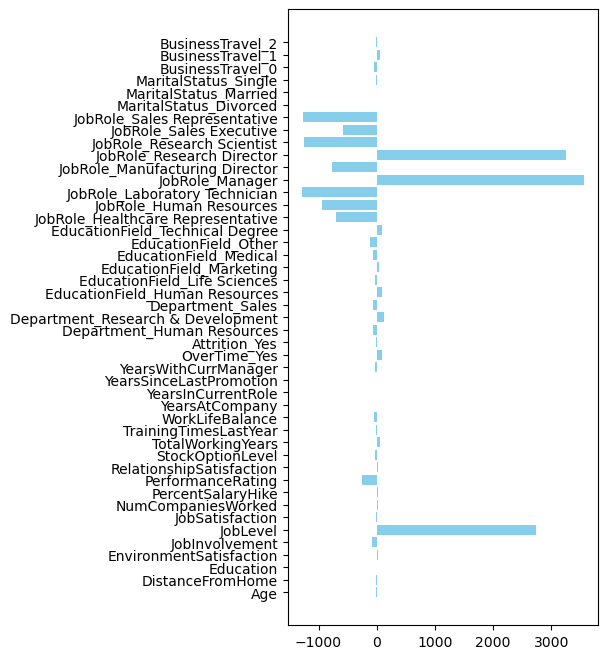

In [77]:
coeffs = model.coef_
features = x_train.columns.values
plt.figure(figsize=(4,8))
plt.barh(features, coeffs, color='skyblue');

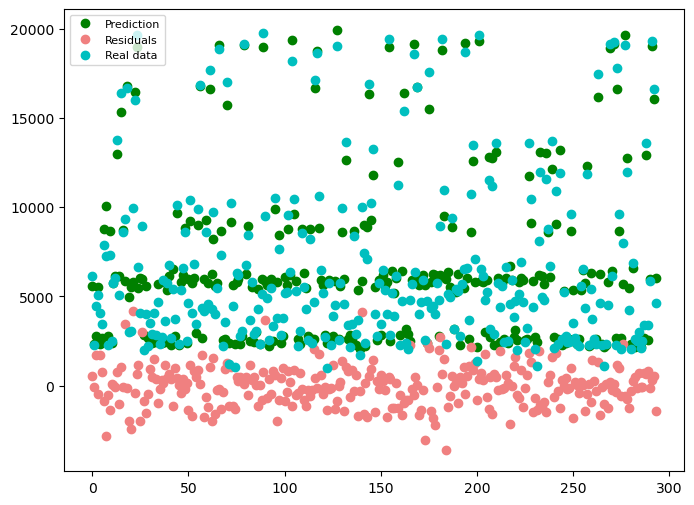

In [35]:
y_predict = model.predict(x_test)
residuals = y_test - y_predict

plt.figure(figsize=(8, 6))
plt.plot(y_predict, 'go', label='Prediction')
plt.plot(np.array(residuals), 'o', color='lightcoral', label='Residuals')
plt.plot(np.array(y_test), 'o', color='c', label='Real data')
plt.legend(['Prediction', 'Residuals', 'Real data'], loc='upper left', prop={'size': 8})
plt.show()

<p style="background-color: white; color: black; font-family: Georgia; font-size: 2em; text-align: left; border-radius: 10px; padding: 10px; box-shadow: 0 4px 8px lightsteelblue; margin: 20px 0; margin-right: 65%; border: 1px solid black;">
2. Attrition predictions
</p>

To predict Attrition we should use other model, because this is a binary variable. So, it's a classification problem.  
Let's try to use several models for it:

### 1. LogisticRegression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score, precision_recall_curve

In [55]:
x_train, x_test, y_train, y_test = train_test_split(ibm_df.drop('Attrition_Yes', axis=1), ibm_df['Attrition_Yes'], test_size=0.2, random_state=33)

# Using solver='lbfgs' option to implement regularization
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(x_train, y_train)

# Checking the score
logreg.score(x_test, y_test)

0.8945578231292517

#### Confusion matrix

A confusion matrix is used to evaluate the performance of a classification model.
It operates such metrics of predictions as: 
- True Positive (TP): Correct positive prediction
- False Positive (FP): Incorrect positive prediction, real label is negative
- False Negative (FN): Incorrect negative prediction, real label is positive
- True Negative (TN): Correct negative prediction


It looks like this:

In [87]:
col_1 = ['TP', 'FP']
col_2 = ['FN', 'TN']
table_data = [col_1] + [col_2]
print(tabulate(table_data, headers='firstrow', tablefmt='fancy_grid'))

╒══════╤══════╕
│ TP   │ FP   │
╞══════╪══════╡
│ FN   │ TN   │
╘══════╧══════╛


Here is the formula to calculate metrics using this terms:

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$

$$F1_{score} = \frac {2 * Precision * Recall}{Precision + Recall}$$

In [57]:
# Let's build a confusion matrix

y_pred = logreg.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1:", f1)

Confusion Matrix:
[[237   9]
 [ 22  26]]
Precision: 0.7428571428571429
Recall: 0.5416666666666666
F1: 0.6265060240963857


### 2. LogisticRegressionCV
This model is a subclass of LogisticRegression, but includes cross-validation.

In [58]:
from sklearn.linear_model import LogisticRegressionCV

In [59]:
x_train, x_test, y_train, y_test = train_test_split(ibm_df.drop('Attrition_Yes', axis=1), ibm_df['Attrition_Yes'], test_size=0.2, random_state=33)

logreg = LogisticRegressionCV(max_iter=10000)
logreg.fit(x_train, y_train)

# Checking the score
logreg.score(x_train, y_train)

0.8801020408163265

#### Confusion matrix

In [61]:
y_pred = logreg.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1:", f1)

Confusion Matrix:
[[237   9]
 [ 24  24]]
Precision: 0.7272727272727273
Recall: 0.5
F1: 0.5925925925925926


### 3. KNeighborsClassifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
x_train, x_test, y_train, y_test = train_test_split(ibm_df.drop('Attrition_Yes', axis=1), ibm_df['Attrition_Yes'], test_size=0.2, random_state=33)

# Create a KNN model and fit it to the training data
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Checking the score on the training set
knn.score(x_test, y_test)

0.8129251700680272

#### Confusion matrix

In [64]:
y_pred = knn.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1:", f1)

Confusion Matrix:
[[237   9]
 [ 46   2]]
Precision: 0.18181818181818182
Recall: 0.041666666666666664
F1: 0.06779661016949153


### 4. Conclusions

So, the third model doesn't seem relevant due to results.  
And the 2-nd model is a bit better then the 1st one. It means that cross-validation is a good option to use as often as it is possible by the task.  
KNN-model showed slightly worse results, especially on precision, recall and f1-score.

Let's use the 2-nd model for further calculations

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ibm_df.drop('Attrition_Yes', axis=1), ibm_df['Attrition_Yes'], test_size=0.2, random_state=33)

logreg = LogisticRegressionCV(max_iter=10000)
logreg.fit(x_train, y_train)

# Checking the score
logreg.score(x_train, y_train)

0.8826530612244898

Now let's calculate thresholds that maximize recall and f1-score:

In [66]:
# First, we predict the probabilities to obtain 1 or 0
# It gives us two arrays, we can take one of them
y_pred_prob = logreg.predict_proba(x_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate F1 score at each threshold
f1_scores = []
for i in range(len(thresholds)):
    score = 2 * precision[i] * recall[i] / (precision[i] + recall[i])
    f1_scores.append(score)

# Find the threshold that maximizes recall and f1-score
max_recall = thresholds[np.argmax(recall)]
max_f1_score = thresholds[np.argmax(f1_scores)]

print("Threshold that maximizes recall:", max_recall)
print("Threshold that maximizes F1 score:", max_f1_score)

Threshold that maximizes recall: 0.0002386867235426604
Threshold that maximizes F1 score: 0.34330950859303744


Let's make a dataframe containing all these values of our model:

In [67]:
# First we zip our data
data = zip(precision, recall, thresholds)

# And then concatenate to a new dataframe
model_scores = pd.DataFrame(data, columns=['Precision', 'Recall', 'Thresholds'])
model_scores

,Precision,Recall,Thresholds
0,0.163265,1.000000,0.000239
1,0.163823,1.000000,0.000335
2,0.164384,1.000000,0.001133
3,0.164948,1.000000,0.001548
4,0.165517,1.000000,0.001588
...,...,...,...
289,1.000000,0.104167,0.785874
290,1.000000,0.083333,0.815596
291,1.000000,0.062500,0.843814
292,1.000000,0.041667,0.873299


Let's look at our precision-recall plot:

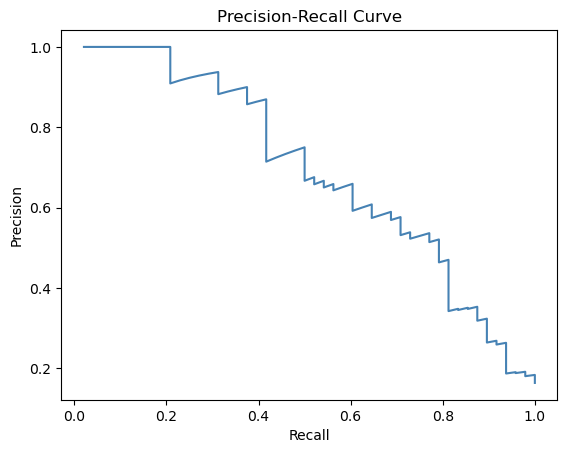

In [71]:
plt.plot(model_scores['Recall'], model_scores['Precision'], color='steelblue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [69]:
# We can find index in our dataframe for max recall
print('index of max precision: ', model_scores['Precision'].idxmax())
# Or that way
print('index of max precision: ', np.argmax(precision))
# And its value:
print('Threshold of max precision: ', model_scores['Thresholds'][np.argmax(precision)])

index of max precision:  284
index of max precision:  284
Threshold of max precision:  0.7336239098735876


Let's show it on the plot:

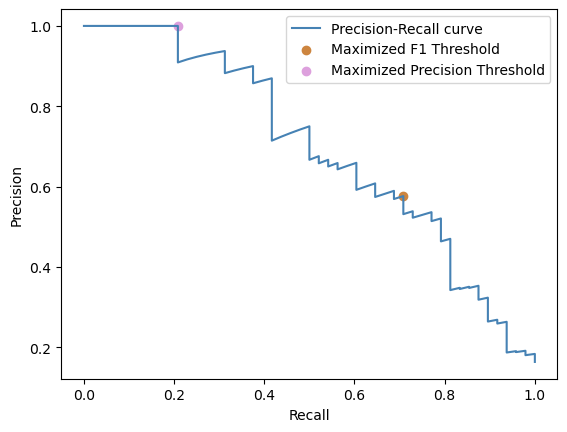

In [73]:
plt.plot(recall, precision, color='steelblue', label='Precision-Recall curve')
plt.scatter(recall[np.argmax(f1_scores)], 
            precision[np.argmax(f1_scores)], 
            color='peru', 
            label='Maximized F1 Threshold')
plt.scatter(recall[np.argmax(precision)], 
            precision[np.argmax(precision)],
            color='plum', 
            label='Maximized Precision Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

<p style="background-color: white; color: black; margin-left: 40%; margin-right: 40%; font-family: Cambria; font-size: 2em; text-align: center; border-radius: 0px; padding: 5px; border: 0px solid black;">
Created by:
</p>
<p style="background-color: white; color: black; font-family: Garamond; font-size: 2em; text-align: left; border-radius: 15px; padding: 25px; box-shadow: 0 4px 8px lightsteelblue; border: 1px solid black;">
Novotochin Artem
    <br>
    <br>
    <br>
Data scientist | Data engineer
</p>